In [1]:
from simulation_model import Patient, run_simulations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Create an initial waiting list (assuming the waiting list has patients at the start of the simulation)

In [2]:
initial_queue = []

# population waiting list with patients with random waiting times
for x in range(1, 100):
    initial_queue.append(Patient(patient_id = x,
                                 waiting_time=np.random.randint(low = 0, high=5))
                         )

Set parameters and run simulation

In [3]:
SIMULATION_HORIZON=52
CAPACITY = [50]*52 # Assume capcity is 50 slots each time step
MEAN_ARRIVALS = 51

In [4]:
waiting_list  = run_simulations(num_simulations=100,
                                time_steps=SIMULATION_HORIZON,
                                initial_queue = initial_queue,
                                capacity=CAPACITY,
                                mean_arr=MEAN_ARRIVALS,
                                dna_rate=0.05,
                                proportion_dna_discharged = 0.05,
                                cancellation_rate = 0.01)

In [5]:
# Inspect first 5 rows
waiting_list.head()

,patient_id,waiting_time,timestamp,sim_num
0,2,3,1,0
1,3,3,1,0
2,5,2,1,0
3,7,1,1,0
4,9,3,1,0


In [6]:
# Get waiting list summaries for each timestep, across all simulations

wl = waiting_list.groupby(by = ['sim_num', 'timestamp']).count()[['patient_id']].reset_index()
waiting_list_df = wl.groupby(by = 'timestamp').median()[['patient_id']].rename(columns={'patient_id':'queue_mean'})
waiting_list_df['queue_upper'] = wl.groupby(by = 'timestamp').quantile(0.95)['patient_id'].values
waiting_list_df['queue_lower'] = wl.groupby(by = 'timestamp').quantile(0.05)['patient_id'].values

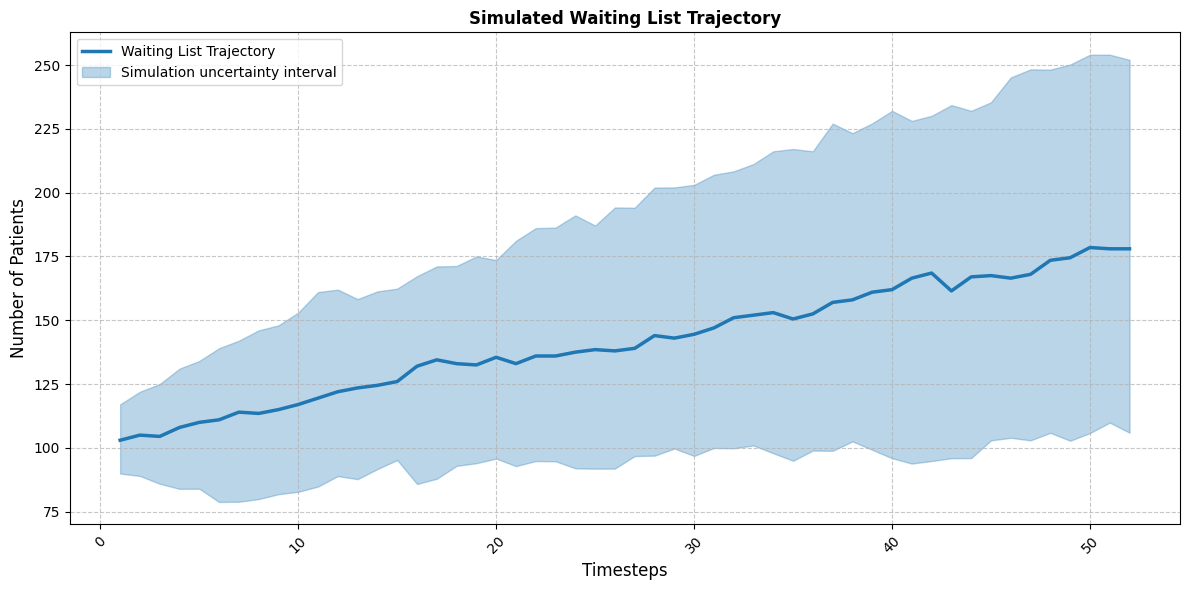

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))

# Line plot for the waiting list trajectory 
ax.plot(waiting_list_df.index, 
        waiting_list_df['queue_mean'], 
        color='#1f77b4', 
        linewidth=2.5, 
        label='Waiting List Trajectory')

ax.fill_between(waiting_list_df.index, 
                waiting_list_df['queue_lower'], 
                waiting_list_df['queue_upper'], 
                color='#1f77b4', 
                alpha=0.3, 
                label='Simulation uncertainty interval')

ax.set_title('Simulated Waiting List Trajectory', 
             fontsize=12, 
             fontweight='bold') 
ax.set_xlabel('Timesteps', fontsize=12) 
ax.set_ylabel('Number of Patients', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
ax.legend()

plt.show()

Visualise waiting time averages

In [8]:
# Get average patient waiting time each timestep
wl = waiting_list.groupby(by = ['sim_num', 'timestamp']).mean()[['waiting_time']].reset_index()

waiting_time_df = wl.groupby(by = 'timestamp').median()[['waiting_time']]
waiting_time_df['waiting_time_upper'] = wl.groupby(by = 'timestamp').quantile(0.95)['waiting_time'].values
waiting_time_df['waiting_time_lower'] = wl.groupby(by = 'timestamp').quantile(0.05)['waiting_time'].values

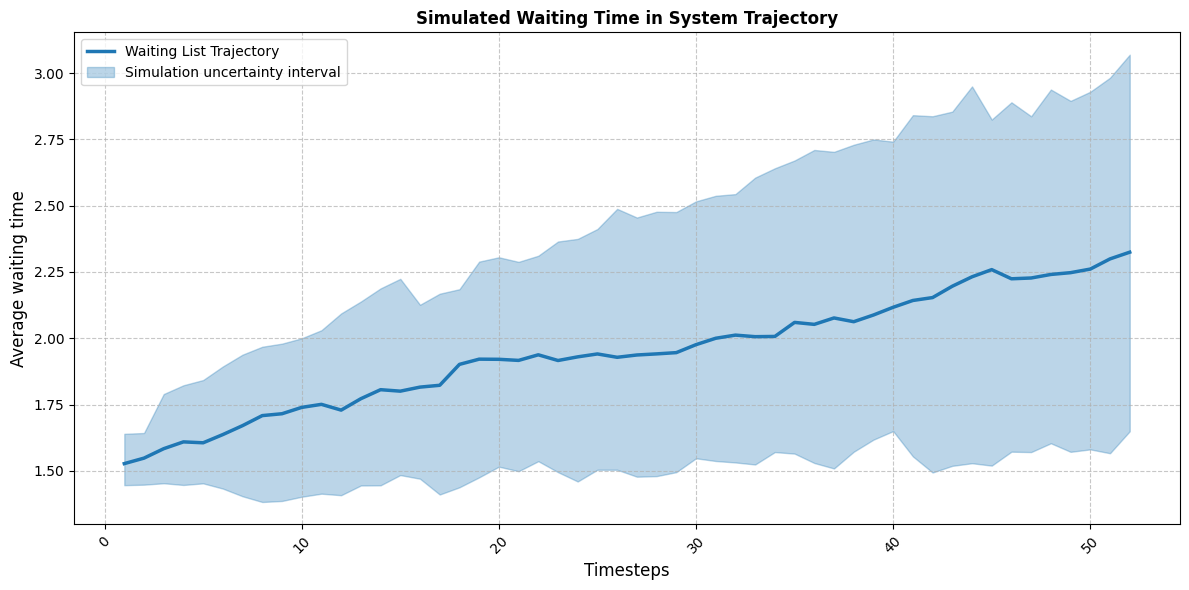

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))

# Line plot for the waiting time trajectory 
ax.plot(waiting_time_df.index, 
        waiting_time_df['waiting_time'], 
        color='#1f77b4', 
        linewidth=2.5, 
        label='Waiting List Trajectory')

ax.fill_between(waiting_time_df.index, 
                waiting_time_df['waiting_time_lower'], 
                waiting_time_df['waiting_time_upper'], 
                color='#1f77b4', 
                alpha=0.3, 
                label='Simulation uncertainty interval')

ax.set_title('Simulated Waiting Time in System Trajectory', 
             fontsize=12, 
             fontweight='bold') 
ax.set_xlabel('Timesteps', fontsize=12) 
ax.set_ylabel('Average waiting time', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
ax.legend()

plt.show()